In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("titanic.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

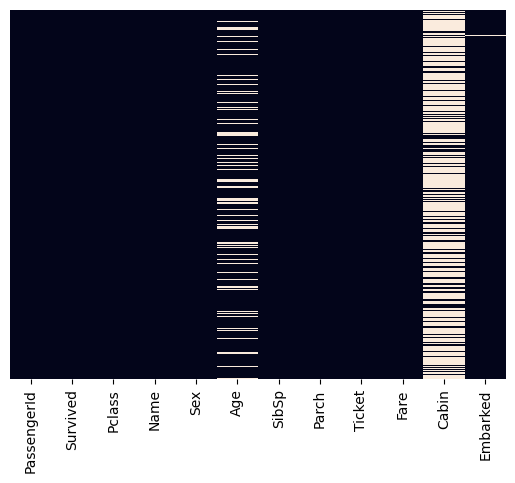

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [23]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [24]:
df.drop(columns=['Cabin'],inplace=True)

In [25]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [26]:
df['Embarked'].fillna("S",inplace=True)

In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [58]:
#How many male passengers died?
len(df.loc[(df.Sex == 'male') & (df.Survived == 0)])

468

In [59]:
# How many female passengers died?
len(df.loc[(df.Sex == 'female') & (df.Survived == 0)])

81

<Axes: xlabel='Sex', ylabel='count'>

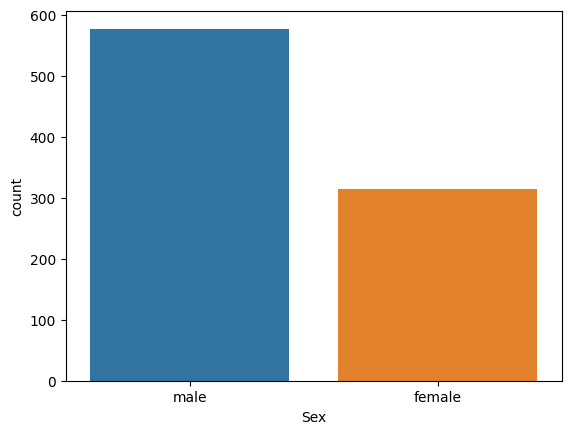

In [29]:
#count total no of males and females
sns.countplot(data=df,x=df['Sex'])

<Axes: xlabel='Pclass', ylabel='count'>

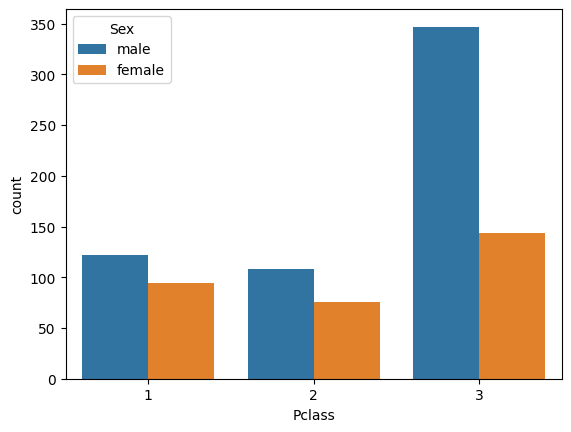

In [33]:
#the gender ratio among the each classes
sns.countplot(x=df['Pclass'],data=df,hue='Sex')

In [34]:
#find the children among the passengers.
def titanic_children(passenger):
    
    age , sex = passenger
    if age <16:
        return 'child'
    else:
        return sex

In [35]:
df['person'] = df[['Age','Sex']].apply(titanic_children,axis=1)

<Axes: xlabel='Pclass', ylabel='count'>

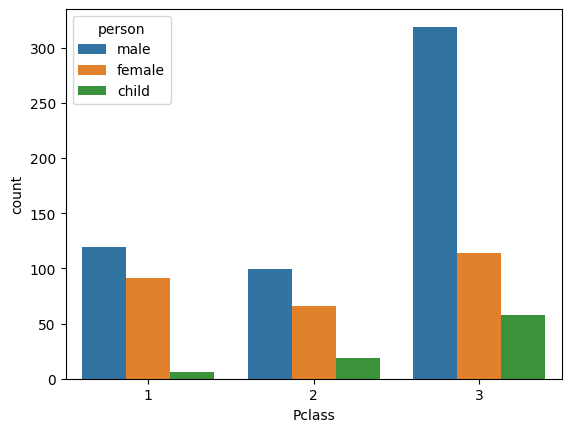

In [36]:
#Plotting a graph to check the ratio of male,female and children in each category of class
sns.countplot(data=df,x=df["Pclass"],hue="person")

<Axes: xlabel='Pclass', ylabel='count'>

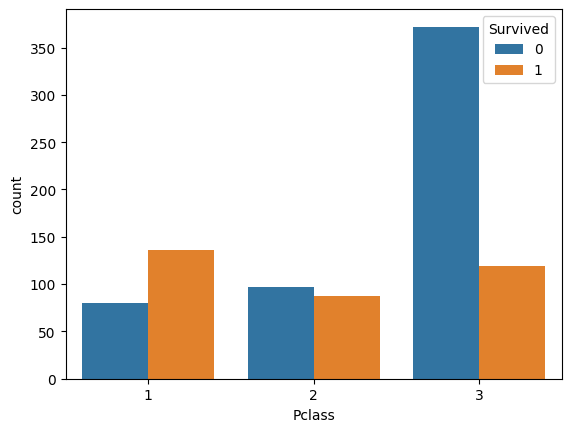

In [38]:
#Total survived in each class
sns.countplot(x=df["Pclass"],hue = df["Survived"],data = df)

<Axes: xlabel='Sex', ylabel='count'>

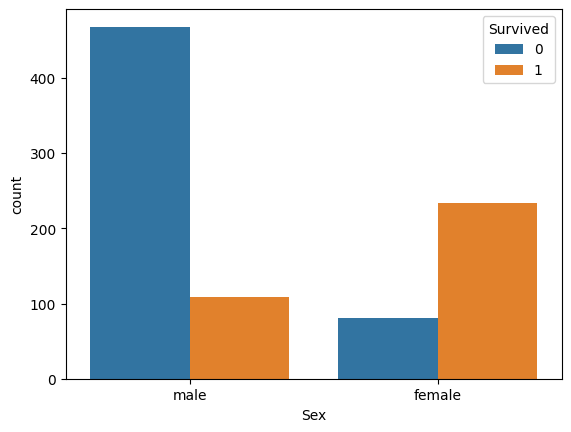

In [40]:
#Total male and female survived ratio
sns.countplot(x=df["Sex"],hue=df["Survived"],data =df)

<Axes: xlabel='Sex', ylabel='count'>

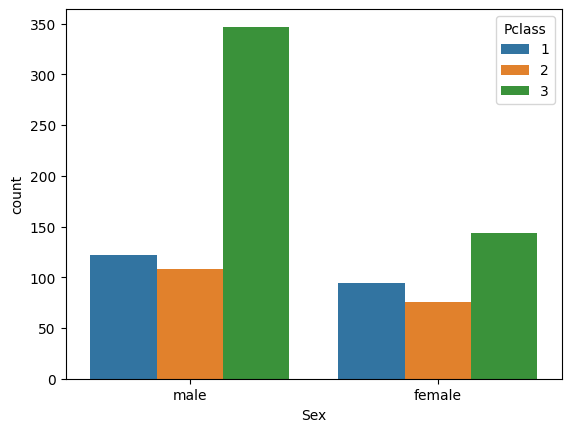

In [41]:
sns.countplot(data=df,x=df["Sex"],hue="Pclass")

<Axes: xlabel='Embarked', ylabel='count'>

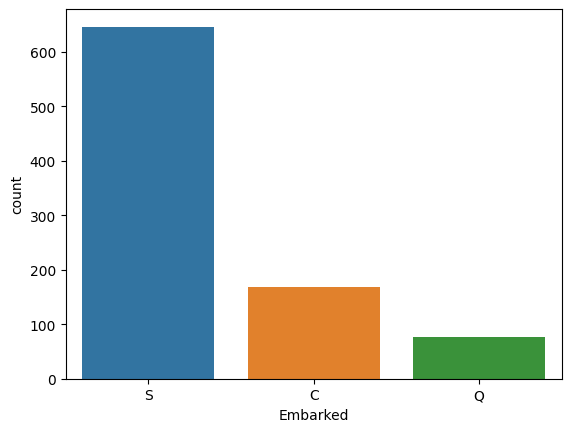

In [43]:
#count graph of embarked
sns.countplot(x=df['Embarked'],data=df)

<Axes: xlabel='Embarked', ylabel='count'>

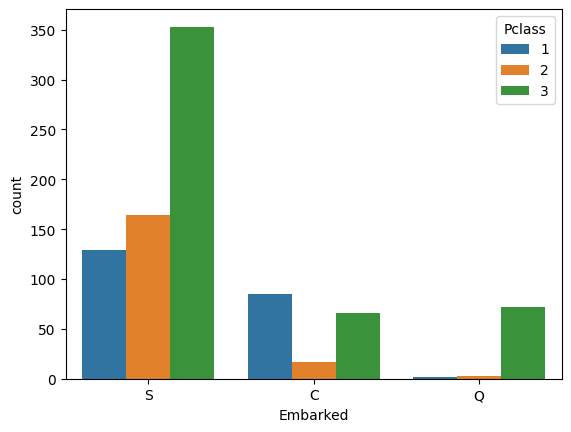

In [44]:
# embarked wise passenger classification
sns.countplot(x=df['Embarked'],data=df,hue='Pclass')

In [45]:
#check who are with family and who are alone , This can be found by adding Parch and Sibsp columns
df['Alone'] = df.Parch + df.SibSp

In [46]:
#if Alone value is >0 then they are with family else they are Alone
df['Alone'].loc[df['Alone']>0] = 'With Family'
df['Alone'].loc[df['Alone'] == 0] = 'Without Family'

In [47]:
#Let visualise the Alone column
df['Alone'].value_counts()

Alone
Without Family    537
With Family       354
Name: count, dtype: int64

<Axes: xlabel='Alone', ylabel='count'>

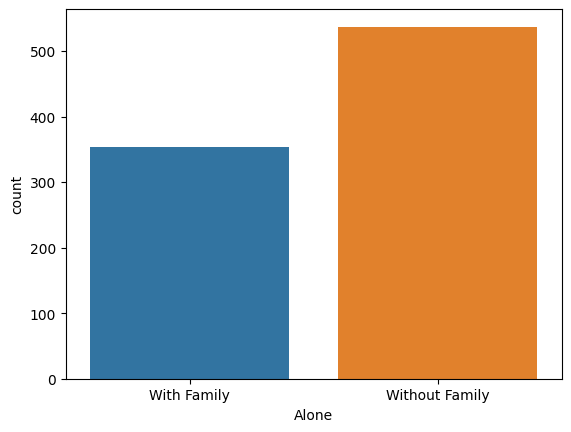

In [49]:
sns.countplot(x=df['Alone'],data=df)

<Axes: xlabel='Alone', ylabel='count'>

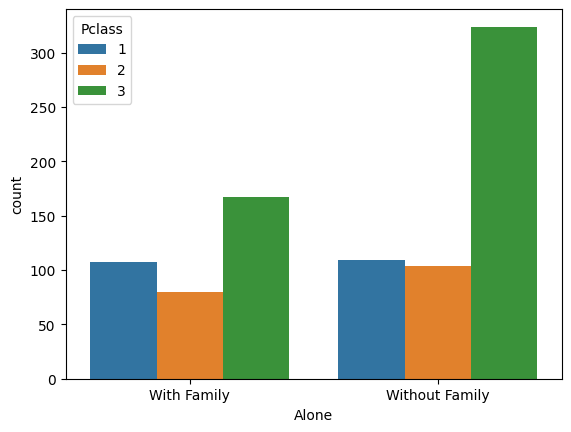

In [55]:
# let us see who are alone according to class
sns.countplot(x ='Alone',data=df,hue='Pclass')